In [1]:
#### import modules
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt

In [2]:
def check_redundant(past_features,new_features): # dataframe and series from df
    df = pd.DataFrame([(c,new_features.name,np.corrcoef(past_features[c],new_features)[0][1]) for c in past_features.columns]
                      ,columns=['past_feature','new_feature','correlation']).sort_values(by='correlation',ascending = False)
    return df

In [3]:
#### standardized dataset
train_activity = pd.read_csv('../lite_data/train_activity_lite.csv')
test_activity = pd.read_csv('../lite_data/test_activity_lite.csv')
train_label = pd.read_csv('../lite_data/train_label_lite.csv')

#### restored dataset
raw_train_activity = pd.read_csv('../transformed/real_values_int.csv')
raw_test_activity = pd.read_csv('../transformed/test_real_datas_int.csv')

#### 컬럼 순서 new_id / wk / 나머지....
cols = raw_train_activity.columns
raw_train_activity = raw_train_activity.loc[:,[cols[-1],cols[-2]] + cols[0:-2].tolist()].copy()
raw_test_activity = raw_test_activity.loc[:,[cols[-1],cols[-2]] + cols[0:-2].tolist()].copy()
cols = raw_train_activity.columns

In [4]:
#### 걍 와꾸 맞추기
train_time_var = raw_train_activity.copy()
test_time_var = raw_test_activity.copy()

In [5]:
#### 변수 정의 - 처음
## X_train, X_test, y_train, label_map
X_train = train_activity.groupby(by='new_id',sort = False,as_index=False).sum().iloc[:,:1]
X_test = test_activity.groupby(by='new_id',sort = False,as_index=False).sum().iloc[:,:1]

In [6]:
past_features = pd.read_csv('features_0901.csv')
past_features = past_features.fillna(0.0)

---

### error data feature sparsity

### 액티비티의 비율...

In [82]:
pd.merge(temp_2,temp_1)

,feature,basic_sparsity,error_sparsity
0,wk,1.00000,1.000000
1,cnt_dt,1.00000,1.000000
2,play_time,1.00000,1.000000
3,game_combat_time,0.75801,0.685797
4,cnt_use_buffitem,0.73294,0.652997
5,quest_hongmun,0.60773,0.421314
6,get_money,0.56432,0.366737
7,quest_exp,0.53370,0.513895
8,npc_exp,0.52595,0.505993
9,npc_hongmun,0.51804,0.311891


### 길드, 파티, 거래의 비율...

* 길드 : 0.16736 $\Longrightarrow$ 0.1603391790325689
* 파티 : 0.54358 $\Longrightarrow$ 0.34079784158797455
* 거래 : 0.3987 $\Longrightarrow$ 0.26012719213721336

* gathering_cnt의 경우... sparsity가 조금 더 증가함....
* activity - quest_exp/ npc_exp / guild_chat / guild 우선 이쪽이 가장 개선이 필요함...

---

### Domain variable

* groupby.sum $\Longrightarrow$ payment_amount by play_time
* groupby.sum $\Longrightarrow$ play_time by cnt_dt
* groupby.sum $\Longrightarrow$ combat_time by pla_ytime
* groupby.sum $\Longrightarrow$ get_money by play_time
* groupby.sum $\Longrightarrow$ cnt_use_buffitem by combat_time
* groupby.sum $\Longrightarrow$ chats by play_time

* 접속패턴...

---

### play_time by cnt_dt

### combat_time by play_time

---

### groupby.sum  ⟹  payment_amount by play_time

In [6]:
#### fe_1 
train_time = train_time_var.loc[:,['new_id','payment_amount','play_time']].groupby(by='new_id').sum()
train_time['payment_amount_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,2:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','payment_amount','play_time']].groupby(by='new_id').sum()
test_time['payment_amount_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,2:], on = 'new_id',how='left')

### groupby.sum  ⟹  play_time by cnt_dt

In [7]:
#### fe_2
train_time = train_time_var.loc[:,['new_id','play_time','cnt_dt']].groupby(by='new_id').sum()
train_time['play_time_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,2:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','play_time','cnt_dt']].groupby(by='new_id').sum()
test_time['play_time_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,2:], on = 'new_id',how='left')

### groupby.sum  ⟹  combat_time by play_time

In [8]:
#### fe_3 
train_time = train_time_var.loc[:,['new_id','game_combat_time','play_time']].groupby(by='new_id').sum()
train_time['game_combat_time_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,2:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','game_combat_time','play_time']].groupby(by='new_id').sum()
test_time['game_combat_time_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,2:], on = 'new_id',how='left')

### groupby.sum  ⟹  get_money by play_time

In [9]:
#### fe_4 
train_time = train_time_var.loc[:,['new_id','get_money','play_time']].groupby(by='new_id').sum()
train_time['get_money_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,2:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','get_money','play_time']].groupby(by='new_id').sum()
test_time['get_money_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,2:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ cnt_use_buffitem by combat_time

* inf 제거 ...

In [10]:
#### fe_5
train_time = train_time_var.loc[:,['new_id','cnt_use_buffitem','game_combat_time']].groupby(by='new_id').sum()
train_time['cnt_use_buffitem_by_game_combat_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
non_reals = np.isnan(train_time.iloc[:,0] / train_time.iloc[:,1]) | np.isinf(train_time.iloc[:,0] / train_time.iloc[:,1])
train_zeros = non_reals.apply(lambda x: 0 if x else 1)
train_time['cnt_use_buffitem_by_game_combat_time'].update(train_zeros.where(non_reals).dropna())
X_train = pd.merge(X_train,train_time.iloc[:,2:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','cnt_use_buffitem','game_combat_time']].groupby(by='new_id').sum()
test_time['cnt_use_buffitem_by_game_combat_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
non_reals = np.isnan(test_time.iloc[:,0] / test_time.iloc[:,1]) | np.isinf(test_time.iloc[:,0] / test_time.iloc[:,1])
test_zeros = non_reals.apply(lambda x: 0 if x else 1)
test_time['cnt_use_buffitem_by_game_combat_time'].update(test_zeros.where(non_reals).dropna())
X_test = pd.merge(X_test,test_time.iloc[:,2:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ chats by play_time

* 접속 시간 대비 얼마나 많은 채팅을 하나?

In [11]:
#### fe_6 
train_time = train_time_var.loc[:,['new_id','play_time']+ [c for c in train_time_var.columns if 'chat' in c ]].groupby(by='new_id').sum()
train_time['chats_by_play_time'] = train_time.iloc[:,1:].sum(axis=1) / train_time.iloc[:,0]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = test_time_var.loc[:,['new_id','play_time']+ [c for c in test_time_var.columns if 'chat' in c ]].groupby(by='new_id').sum()
test_time['chats_by_play_time'] = test_time.iloc[:,1:].sum(axis=1) / test_time.iloc[:,0]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

In [17]:
X_train.to_csv('X_train_act_comb.csv',index = False)
X_test.to_csv('X_test_act_comb.csv',index = False)

---

### groupby.sum $\Longrightarrow$ game_combat_time by cnt_dt

In [6]:
train_time = raw_train_activity.loc[:,['new_id','game_combat_time', 'cnt_dt']].groupby(by='new_id').sum()
train_time['game_combat_time_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','game_combat_time', 'cnt_dt']].groupby(by='new_id').sum()
test_time['game_combat_time_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ npc_exp by cnt_dt

In [7]:
train_time = raw_train_activity.loc[:,['new_id','npc_exp', 'cnt_dt']].groupby(by='new_id').sum()
train_time['npc_exp_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','npc_exp', 'cnt_dt']].groupby(by='new_id').sum()
test_time['npc_exp_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ quest_exp by cnt_dt

In [8]:
train_time = raw_train_activity.loc[:,['new_id','quest_exp', 'cnt_dt']].groupby(by='new_id').sum()
train_time['quest_exp_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','quest_exp', 'cnt_dt']].groupby(by='new_id').sum()
test_time['quest_exp_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ npc_hongmun by cnt_dt

In [9]:
train_time = raw_train_activity.loc[:,['new_id','npc_hongmun', 'cnt_dt']].groupby(by='new_id').sum()
train_time['npc_hongmun_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','npc_hongmun', 'cnt_dt']].groupby(by='new_id').sum()
test_time['npc_hongmun_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ quest_hongmun by cnt_dt

In [10]:
train_time = raw_train_activity.loc[:,['new_id','quest_hongmun', 'cnt_dt']].groupby(by='new_id').sum()
train_time['quest_hongmun_by_cnt_dt'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','quest_hongmun', 'cnt_dt']].groupby(by='new_id').sum()
test_time['quest_hongmun_by_cnt_dt'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ npc_exp by play_time

In [11]:
train_time = raw_train_activity.loc[:,['new_id','npc_exp', 'play_time']].groupby(by='new_id').sum()
train_time['npc_exp_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','npc_exp', 'play_time']].groupby(by='new_id').sum()
test_time['npc_exp_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ quest_exp by play_time

In [12]:
train_time = raw_train_activity.loc[:,['new_id','quest_exp', 'play_time']].groupby(by='new_id').sum()
train_time['quest_exp_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','quest_exp', 'play_time']].groupby(by='new_id').sum()
test_time['quest_exp_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ npc_hongmun by play_time

In [13]:
train_time = raw_train_activity.loc[:,['new_id','npc_hongmun', 'play_time']].groupby(by='new_id').sum()
train_time['npc_hongmun_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','npc_hongmun', 'play_time']].groupby(by='new_id').sum()
test_time['npc_hongmun_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

### groupby.sum $\Longrightarrow$ hongmun_exp by play_time

In [14]:
train_time = raw_train_activity.loc[:,['new_id','quest_hongmun', 'play_time']].groupby(by='new_id').sum()
train_time['quest_hongmun_by_play_time'] = train_time.iloc[:,0] / train_time.iloc[:,1]
X_train = pd.merge(X_train,train_time.iloc[:,-1:], on = 'new_id',how='left')

test_time = raw_test_activity.loc[:,['new_id','quest_hongmun', 'play_time']].groupby(by='new_id').sum()
test_time['quest_hongmun_by_play_time'] = test_time.iloc[:,0] / test_time.iloc[:,1]
X_test = pd.merge(X_test,test_time.iloc[:,-1:], on = 'new_id',how='left')

In [16]:
X_train.to_csv('X_train_comb_new.csv',index = False)
X_test.to_csv('X_test_comb_new.csv',index = False)

---

In [6]:
#### first week로 subsetting
time_first_train = pd.read_csv('../Features/train_first_week.csv')
first_time_series_train = pd.merge(time_first_train, raw_train_activity)
first_time_series_train = first_time_series_train.loc[first_time_series_train.wk >= first_time_series_train.first_week,:]

time_first_test = pd.read_csv('../Features/test_first_week.csv')
first_time_series_test = pd.merge(time_first_test, raw_test_activity)
first_time_series_test = first_time_series_test.loc[first_time_series_test.wk >= first_time_series_test.first_week,:]

In [7]:
guild_chat_train = first_time_series_train.loc[:,['new_id','guild_chat']].groupby(by='new_id').last() - first_time_series_train.loc[:,['new_id','guild_chat']].groupby(by='new_id').max()
guild_chat_test = first_time_series_test.loc[:,['new_id','guild_chat']].groupby(by='new_id').last() - first_time_series_test.loc[:,['new_id','guild_chat']].groupby(by='new_id').max()

In [9]:
guild_chat_train.columns = ['guild_chat_d(last,max)']
guild_chat_test.columns = ['guild_chat_d(last,max)']

In [10]:
X_train= pd.merge(X_train,guild_chat_train,left_on='new_id',right_on=guild_chat_train.index,how='left')
X_test= pd.merge(X_test,guild_chat_test,left_on='new_id',right_on=guild_chat_test.index,how='left')

In [14]:
import joblib

In [17]:
import xgboost as xgb

In [15]:
model = joblib.load('../MODELS/xgb0.742')

/opt/conda/lib/python3.6/site-packages/sklearn/base.py:311: UserWarning: Trying to unpickle estimator LabelEncoder from version 0.19.2 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)


In [24]:
!pip install graphviz

In [37]:
importance_dict = model.get_booster().get_fscore()

In [45]:
importance_df = pd.DataFrame([(k,importance_dict[k]) for k in importance_dict.keys()]).sort_values(by=1,ascending = False).reset_index()

TypeError: reset_index() got an unexpected keyword argument 'index'

In [58]:
importance_df.loc[importance_df[0]=='chats_by_play_time']

,index,0,1
29,34,chats_by_play_time,10759


In [47]:
importance_df.loc[importance_df[0]=='game_combat_time_by_cnt_dt']

,index,0,1
24,261,game_combat_time_by_cnt_dt,12987


In [22]:
model.apply()

<bound method XGBModel.apply of XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.75, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=12, min_child_weight=4, missing=nan,
       n_estimators=1524, n_gpus=-1, n_jobs=1, nthread=None, num_class=4,
       objective='multi:softprob', random_state=0, reg_alpha=0.058,
       reg_lambda=0.049, scale_pos_weight=1, seed=7, silent=0,
       subsample=0.95, tree_method='gpu_hist')>

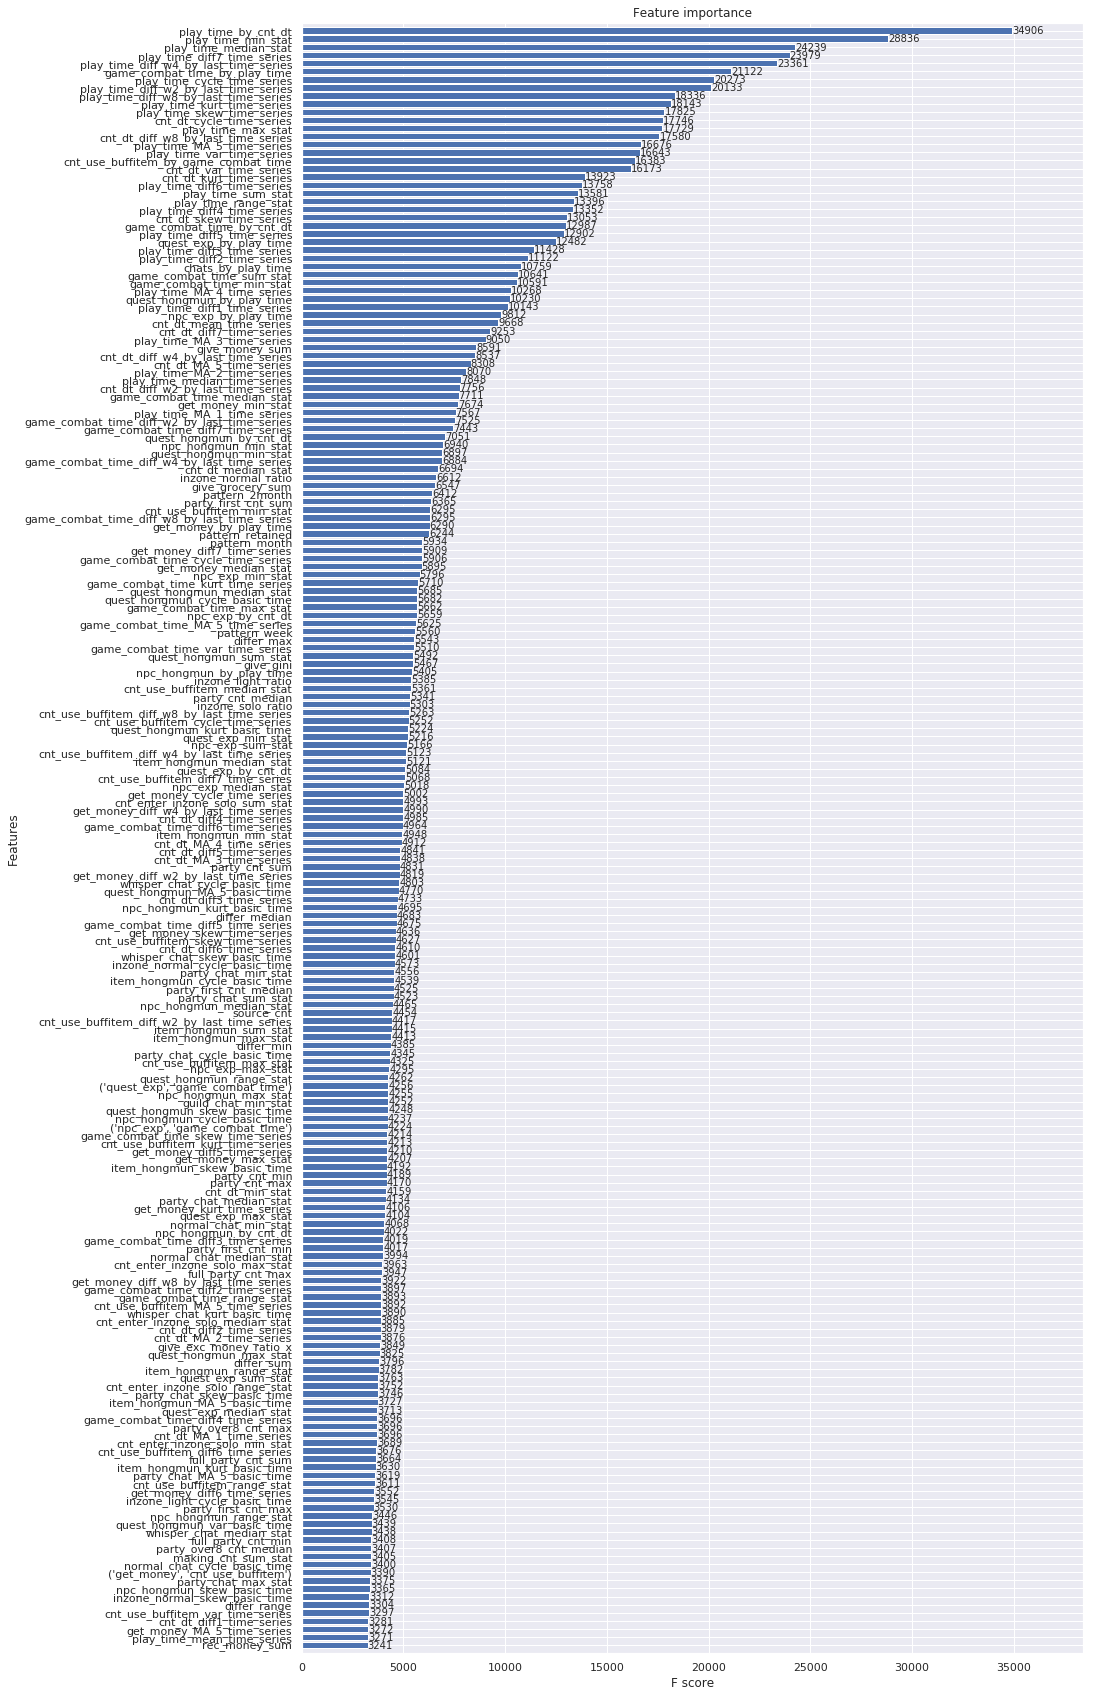

In [18]:
fig, ax = plt.subplots(figsize=(14,30))
xgb.plot_importance(model, max_num_features=200, height=0.8, ax=ax)
plt.show()